# Exercice 2 : Régression Logistique (LR) et Support Vector Machine (SVM)

Reprise du code déjà réalisé

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
def calculate_accuracy(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy_test = metrics.accuracy_score(y_test, y_pred_test)
    print('Train accuracy:', '{:.3f}'.format(accuracy_train), 'Test accuracy:', '{:.3f}'.format(accuracy_test))
    return accuracy_train, accuracy_test, classifier

In [3]:
random_state = 42
data = pd.read_csv('../data/colon_cancer.csv', sep=';', index_col='id_sample')
y = data['tissue_status']
X = data.select_dtypes('number')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=random_state, stratify=y)
print('Train:', X_train.shape, 'Test:', X_test.shape)

Train: (603, 60) Test: (201, 60)


## Question 1. Appliquer une normalisation centrée-réduite aux données

Pour faciliter la convergence des algorithmes de machine learning, il est fortément conseillé de normaliser les données. Une approche standard est la normalisation centrée-réduite qui soustrait la moyenne et divise par l'écart-type les valeurs d'expression.

**Attention !** Le calcul de la moyenne $\mu$ et l'écart-type $\sigma$ doit être réalisé **uniquement sur le dataset d'entrainement**. Le dataset de test ne doit pas être utilisé dans le calcul. Il sera normalisé en utilisant les valeurs $\mu$ et $\sigma$ calculées sur le dataset d'entrainement.

La librairie **scikit-learn** contient un certain nombre de *scalers* qui permettent de réaliser facilement cette normalisation. Ainsi, le scaler `StandardScaler` permet de centrer-réduire les données.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # crée un scaler
scaler.fit(X_train) # calcule mu et sigma sur X_train uniquement

StandardScaler()

In [6]:
# Décommenter et exécuter les lignes ci-dessous pour afficher mu et sigma pour chaque gène
# print('Mean mu', scaler.mean_)
# print('Std sigma', scaler.scale_)
print('Mean mu', scaler.mean_)
print('Std sigma', scaler.scale_)

Mean mu [5.56250784 4.37031229 5.5576452  4.5032885  6.70477296 7.20224541
 2.73722189 2.83883913 3.09567408 3.62783178 4.9956429  8.00645284
 2.13428824 3.25051517 5.72798593 2.602014   5.09621073 4.95027125
 5.12856168 2.60945896 4.57087133 2.61901627 4.00316847 2.83774532
 5.05378073 4.70302486 4.48579809 5.2552879  5.10330709 3.87416991
 4.42493323 3.41604512 2.99677417 3.12825274 3.21237453 2.94096313
 4.059025   2.56226458 4.03283796 2.46987601 3.61611895 3.06480367
 4.18373897 3.33961906 4.60751801 3.22049712 4.79100352 3.19601853
 2.16639761 5.46168857 3.59541576 4.6518569  4.25604076 4.60405964
 4.10572903 1.79212905 2.84821267 6.10344378 2.81507307 2.61131882]
Std sigma [2.87450773 1.41750502 1.16900926 1.62727559 1.08192036 1.39528512
 1.4405307  1.25002277 1.20996386 1.2651503  0.7258847  3.02651441
 0.6970907  0.8496204  1.10564825 1.29408208 1.25535892 2.70235274
 0.83604128 1.45557859 1.36504482 0.89653108 0.89616633 0.74177497
 0.76354578 1.08303667 0.89196864 1.0768317

Appliquer les valeurs $\mu$ et $\sigma$ calculées pour X_train aux deux datasets : **X_train** et **X_test**. Pour cela, il faut utiliser la méthode `transform` du *scaler*. 

In [7]:
# A exécuter
X_train_scaled = scaler.transform(X_train) # numpy object
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns) # conversion en pandas DataFrame

X_test_scaled = scaler.transform(X_test) # numpy object
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns) # conversion en pandas DataFrame

Après normalisation, la moyenne des valeurs d'expression pour chaque gène dans le dataset **X_train_scaled** doit être égale 0. Vérifiez que c'est réellement le cas. Pour cela, calculez la moyenne à l'aide de la méthode `mean()` et affichez quelques premières valeurs avec `head()`.

In [8]:
# X_train_scaled... # à compléter 
X_train_scaled.mean().head()

ADH1C     6.812314e-17
DHRS11   -1.697555e-16
UGP2     -7.202641e-16
SLC7A5   -1.417698e-16
CTSS      5.910142e-17
dtype: float64

Après normalisation, l'écart-type doit être égal à 1. Vérifiez-le en calculant l'écart-type du dataset **X_train_scaled** à l'aide de la méthode `std()`. Affichez quelques premières valeurs avec `head()`.

In [9]:
# X_train_scaled... # à compléter
X_train_scaled.std().head()

ADH1C     1.00083
DHRS11    1.00083
UGP2      1.00083
SLC7A5    1.00083
CTSS      1.00083
dtype: float64

## Question 2. Créer un modèle de régression logistique (LR)

La **régresssion logistique** utilise une fonction analytique, appelée fonction **logistique** ou fonction **sigmoïde**, qui a une forme caractéristique en **S**. En optimisant les coefficients de cette courbe (*max* de vraisemblance ou *min* de cross-entropie), elle permet d'estimer la probabilité pour un échantillon d'appartenir à telle ou telle classe. Par exemple, *tumoral* versus *normal*. 

<img src="logistic_regression.png" alt="Logistic regression" width="600" aling="center">

Créez le modèle de LR en utilisant les données normalisées et calculer la métrique *accuracy*.

In [10]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=random_state, penalty='none')

# accuracy_train, accuracy_test, trained_classifier = calculate_accuracy(classifier, ... , ... , y_train, y_test) # à compléter
accuracy_train, accuracy_test, trained_classifier = calculate_accuracy(classifier, X_train_scaled, X_test_scaled, y_train, y_test)

Train accuracy: 1.000 Test accuracy: 1.000


Affichez la matrice de confusion.

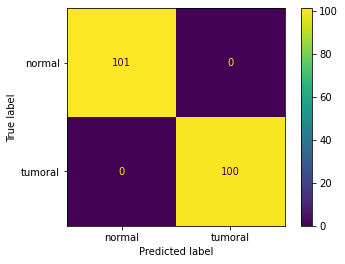

In [11]:
# metrics.plot_confusion_matrix(trained_classifier, ... , ...) # à compléter
metrics.plot_confusion_matrix(trained_classifier, X_test_scaled, y_test)

Est-ce que ce modèle est plus performant que Decision Tree ou Random Forest de l'exercice 1 ?

## Question 3. Evaluer l'impact de chaque gène dans le modèle LR

Après la phase d'entrainement, il est possible de connaître les paramètres $\beta$ du modèle obtenu. Il sont disponibles dans l'attribut `coef_`. Plus le coefficient $\beta$ est grand (en valeur absolue), plus l'impact du gène correspondant est important dans le modèle.

Affichez les coefficients $\beta$ pour quelques premiers gènes :

In [12]:
coefficients = pd.DataFrame(trained_classifier.coef_[0], index=X_train_scaled.columns, columns=['beta'])
coefficients.head()

,beta
ADH1C,-1.095463
DHRS11,-1.412367
UGP2,-2.444311
SLC7A5,3.980374
CTSS,-0.411723


Présentez les coefficients $\beta$ sous forme d'un *barplot*, du plus petit au plus grand.

<AxesSubplot:>

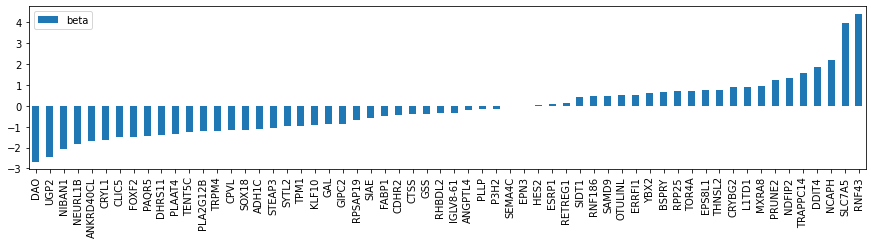

In [13]:
coefficients = coefficients.sort_values(by='beta')
coefficients.plot.bar(figsize=(15, 3))

Quels gènes impactent fortement le modèle ?

## Question 4. Analyser la corrélation entre les meilleurs prédicteurs proposés par le modèle

Identifiez N meilleurs gènes qui impactent le plus fortement le modèle LR.

In [14]:
n_features = 3
coefficients['abs_beta'] = coefficients['beta'].abs() # calcul des valeurs absolues des beta
coefficients = coefficients.sort_values(by='abs_beta', ascending=False) # tri par valeurs absolues
top_features = list(coefficients.head(n_features).index) # liste de n meilleurs features
print('Top features LR:', top_features)

Top features LR: ['RNF43', 'SLC7A5', 'DAO']


Affichez un paiplot pour ces gènes, pour estimer qualitativement leur corrélation. Utilisez la librairie *seaborn* de Python.

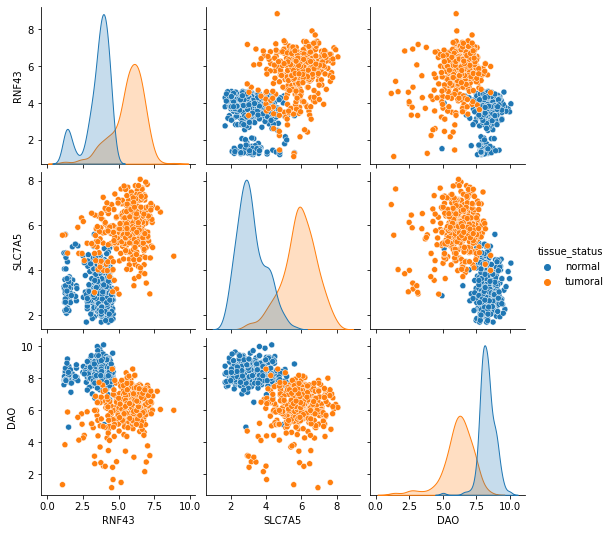

In [15]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[[*top_features, 'tissue_status']], hue='tissue_status')

Est-ce que les gènes sont corrélés ? Est-ce qu'il y a un intérêt de les utiliser ensemble pour l'apprentissage du modèle ?

## Question 5. Calculer les performances du modèle LR en utilisant 1, 2, ... n top features 

Qu'est-ce que fait le code ci-dessous ? Exécutez-le et expliquez le résultat.

In [16]:
for i in range(len(top_features)):
    selected_features = top_features[0:i+1]
    print(selected_features)
    accuracy_train, accuracy_test, trained_classifier = calculate_accuracy(classifier, X_train_scaled[selected_features], X_test_scaled[selected_features], y_train, y_test)

['RNF43']
Train accuracy: 0.919 Test accuracy: 0.841
['RNF43', 'SLC7A5']
Train accuracy: 0.964 Test accuracy: 0.935
['RNF43', 'SLC7A5', 'DAO']
Train accuracy: 0.992 Test accuracy: 0.990


## Question 6. Créer un modèle linéaire de Support Vector Machine (SVM)

Le **modèle SVM** cherche à définir une frontière entre deux ou plusieurs classes d'échantillons, en maximisant la marge entre cette frontière et les échantillons les plus proches (vecteurs de support).

<img src="svm.png" alt="Support Vector Machine" width="600" aling="center">

Créez le modèle SVM en utilisant les données normalisées, calculez la métrique *accuracy* et la matrice de confusion.

Train accuracy: 1.000 Test accuracy: 1.000


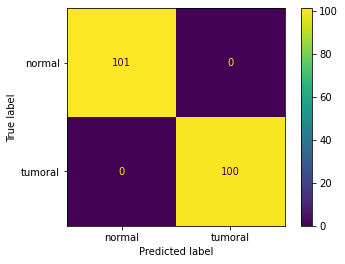

In [17]:
from sklearn.svm import LinearSVC

classifier = LinearSVC(random_state=random_state)

# accuracy_train, accuracy_test, trained_classifier = calculate_accuracy(...) # à compléter
# metrics.plot_confusion_matrix(...) # à compléter
accuracy_train, accuracy_test, trained_classifier = calculate_accuracy(classifier, X_train_scaled, X_test_scaled, y_train, y_test)
metrics.plot_confusion_matrix(trained_classifier, X_test_scaled, y_test)

## Question 7. Evaluer l'impact de chaque gène dans le modèle SVM

<AxesSubplot:>

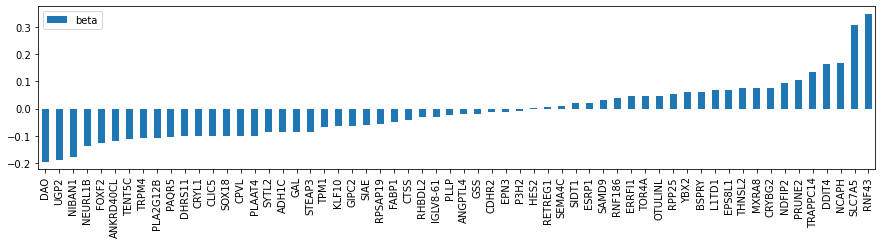

In [18]:
coefficients = pd.DataFrame(trained_classifier.coef_[0], index=X_train_scaled.columns, columns=['beta'])

coefficients = coefficients.sort_values(by='beta')
coefficients.plot.bar(figsize=(15, 3))

In [19]:
coefficients['abs_beta'] = coefficients['beta'].abs()
coefficients = coefficients.sort_values(by='abs_beta', ascending=False)
top_features = list(coefficients.head(n_features).index)
print('Top features SVM:', top_features)

Top features SVM: ['RNF43', 'SLC7A5', 'DAO']


Comparez le résultat avec LR. 

## Question 8. Etude de cas

L'hôpital *AI-Hospital* a mis au point un nouvel outil diagnostique basé sur les niveaux d'expression d'un panel de 3 gènes. Cet outil a donné les mesures suivantes pour un nouveau patient à l'hôpital :

In [20]:
# new_patient = {'RNF43': 4.68, 'SLC7A5': 4.10, 'DAO': 7.59} # dict
new_patient = {'RNF43': 4.68, 'SLC7A5': 4.10, 'DAO': 7.59}

### Question principale : Est-ce que ce patient est atteint d'un cancer du colon ?

Composez un dataset de test **X_test** qui contient un seul échantillon - le nouveau patient.

In [21]:
X_test = pd.DataFrame([new_patient], index=['new_patient'])
X_test

,RNF43,SLC7A5,DAO
new_patient,4.68,4.1,7.59


In [22]:
panel = X_test.columns # liste de gènes dans le panel
print(panel)

Index(['RNF43', 'SLC7A5', 'DAO'], dtype='object')


Utilisez la totalité de données disponibles en tant que dataset d'entrainement **X_train**.

In [23]:
X_train = data[panel]
y_train = y

Entrainez une Régression Logistique. Faites une prédiction pour le patient.

In [24]:
# Code à écrire soi-même

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = LogisticRegression(random_state=random_state, penalty='none')
classifier.fit(X_train_scaled, y_train)
y_new_patient = classifier.predict(X_test_scaled)
print(classifier, y_new_patient)

LogisticRegression(penalty='none', random_state=42) ['normal']


### Question bonus : Quelle est la probabilité prédite pour ce patient d'avoir un cancer du colon ? 

Indice : Utilisez la méthode `predict_proba()` du modèle à la place de `predict()` pour obtenir la probabilité de prédiction.

In [25]:
# Code à écrire soi-même
proba_new_patient = classifier.predict_proba(X_test_scaled)
print(classifier, y_new_patient, proba_new_patient)

LogisticRegression(penalty='none', random_state=42) ['normal'] [[0.74354142 0.25645858]]


In [26]:
# En utilisant SVM 
from sklearn.svm import SVC
classifier = SVC(random_state=random_state, probability=True)
classifier.fit(X_train_scaled, y_train)
y_new_patient = classifier.predict(X_test_scaled)
proba_new_patient = classifier.predict_proba(X_test_scaled)
print(classifier, y_new_patient, proba_new_patient)

SVC(probability=True, random_state=42) ['normal'] [[0.79513988 0.20486012]]


In [27]:
# En utilisant RF 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, n_estimators=5, random_state=random_state)
classifier.fit(X_train_scaled, y_train)
y_new_patient = classifier.predict(X_test_scaled)
proba_new_patient = classifier.predict_proba(X_test_scaled)
print(classifier, y_new_patient, proba_new_patient)

RandomForestClassifier(max_depth=2, n_estimators=5, random_state=42) ['normal'] [[0.63381752 0.36618248]]
